In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings("ignore")

In [2]:
df_bike = pd.read_csv("SeoulBikeData.csv")
df_bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas

In [3]:
df_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      8760 non-null   object 
 1   Rented Bike Count         8760 non-null   int64  
 2   Hour                      8760 non-null   int64  
 3   Temperature(C)            8760 non-null   float64
 4   Humidity(%)               8760 non-null   int64  
 5   Wind speed (m/s)          8760 non-null   float64
 6   Visibility (10m)          8760 non-null   int64  
 7   Dew point temperature(C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)   8760 non-null   float64
 9   Rainfall(mm)              8760 non-null   float64
 10  Snowfall (cm)             8760 non-null   float64
 11  Seasons                   8760 non-null   object 
 12  Holiday                   8760 non-null   object 
 13  Functioning Day           8760 non-null   object 
dtypes: float

In [4]:
#check for count of missing values in each column.
df_bike.isna().sum()
df_bike.isnull().sum()

Date                        0
Rented Bike Count           0
Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
dtype: int64

In [5]:
# Can break the date into date, month, year columns and convert them into integers (from strings) for the purpose of correlation map

days = [int((df_bike['Date'].iloc[i])[0:2]) for i in range(len(df_bike))]
month = [int((df_bike['Date'].iloc[i])[3:5]) for i in range(len(df_bike))]
year = [int((df_bike['Date'].iloc[i])[6:]) for i in range(len(df_bike))]
df_bike['Day'], df_bike['Month'], df_bike['Year'] = days, month, year

In [6]:
df_bike.head(5)

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Day,Month,Year
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,1,12,2017


   Rented Bike Count  Hour  Temperature(C)  Humidity(%)  Wind speed (m/s)  \
0                254     0            -5.2           37               2.2   
1                204     1            -5.5           38               0.8   
2                173     2            -6.0           39               1.0   

   Visibility (10m)  Dew point temperature(C)  Solar Radiation (MJ/m2)  \
0              2000                     -17.6                      0.0   
1              2000                     -17.6                      0.0   
2              2000                     -17.7                      0.0   

   Rainfall(mm)  Snowfall (cm)  Seasons  Holiday  Functioning Day  Day  Month  \
0           0.0            0.0        0        0                0    1     12   
1           0.0            0.0        0        0                0    1     12   
2           0.0            0.0        0        0                0    1     12   

   Year  
0  2017  
1  2017  
2  2017  


<Axes: >

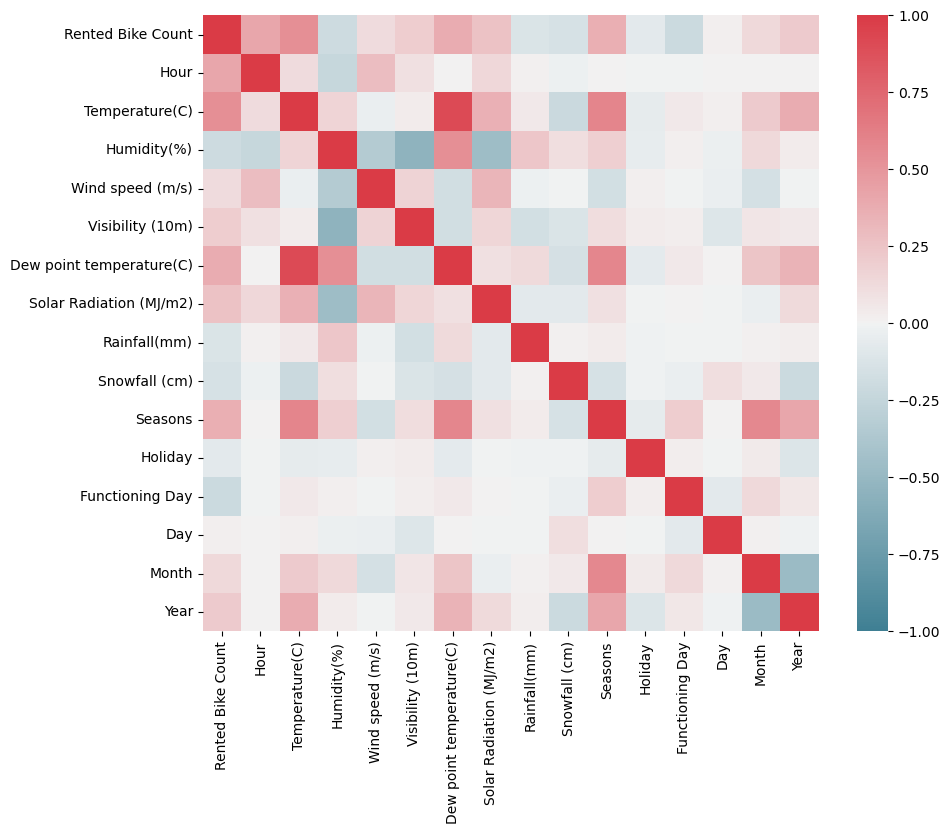

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
df1_bike = df_bike.drop(columns = ['Date'])
# map unique season to numbers, map holiday to binary, and functioning day to binary
seasons = {}
for idx, i in enumerate(df_bike['Seasons'].drop_duplicates()):
    seasons[i] = idx
holiday = {"No Holiday": 0, "Holiday": 1}
functioning = {"Yes": 0, "No": 1}
df1_bike.Holiday = [holiday[item] for item in df_bike.Holiday]
df1_bike.Seasons = [seasons[item] for item in df_bike.Seasons]
df1_bike['Functioning Day'] = [functioning[item] for item in df1_bike['Functioning Day'] ]

df1_bike.head(3)


f, ax = plt.subplots(figsize=(10, 8))
corr = df1_bike.corr()
sns.heatmap(corr,
    cmap=sns.diverging_palette(220, 10, as_cmap=True),
    vmin=-1.0, vmax=1.0,
    square=True, ax=ax)

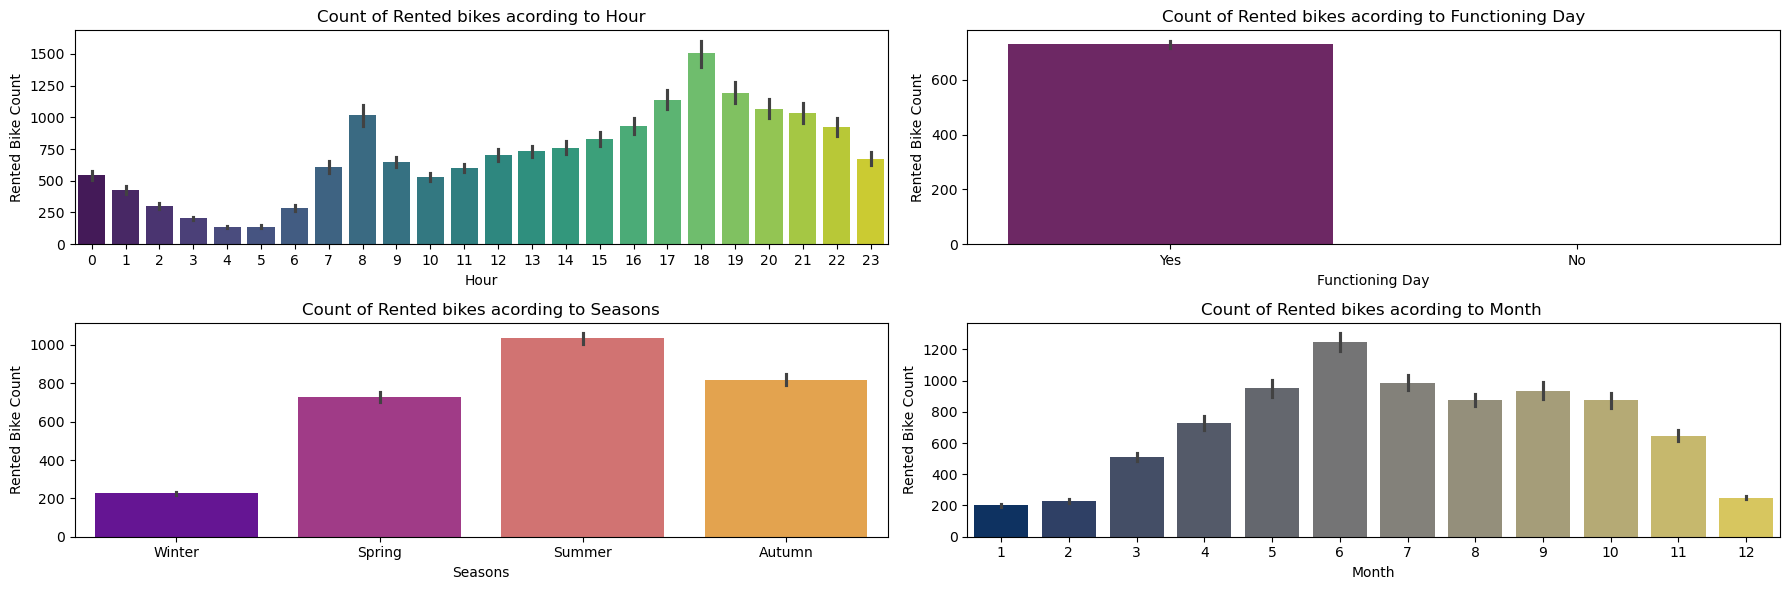

In [8]:
plt.rcParams["figure.autolayout"] = True
fig, ax = plt.subplots(2, 2, figsize=(18, 6));
# hour vs bike count
sns.barplot(data=df1_bike,x='Hour',y='Rented Bike Count',ax=ax[0][0], palette='viridis');
ax[0][0].set(title='Count of Rented bikes acording to Hour');

# Functioning vs bike count
sns.barplot(data=df1_bike,x='Functioning Day',y='Rented Bike Count',ax=ax[0][1], palette='inferno');
ax[0][1].set(title='Count of Rented bikes acording to Functioning Day');
ax[0][1].set_xticklabels(['Yes', 'No'])

# season vs bike count
sns.barplot(data=df1_bike,x='Seasons', y='Rented Bike Count',ax=ax[1][0], palette='plasma');
ax[1][0].set(title='Count of Rented bikes acording to Seasons');
ax[1][0].set_xticklabels(['Winter', 'Spring', 'Summer', 'Autumn'])

# month vs bike count
sns.barplot(data=df1_bike,x='Month',y='Rented Bike Count',ax=ax[1][1], palette='cividis');
ax[1][1].set(title='Count of Rented bikes acording to Month ');

plt.show()



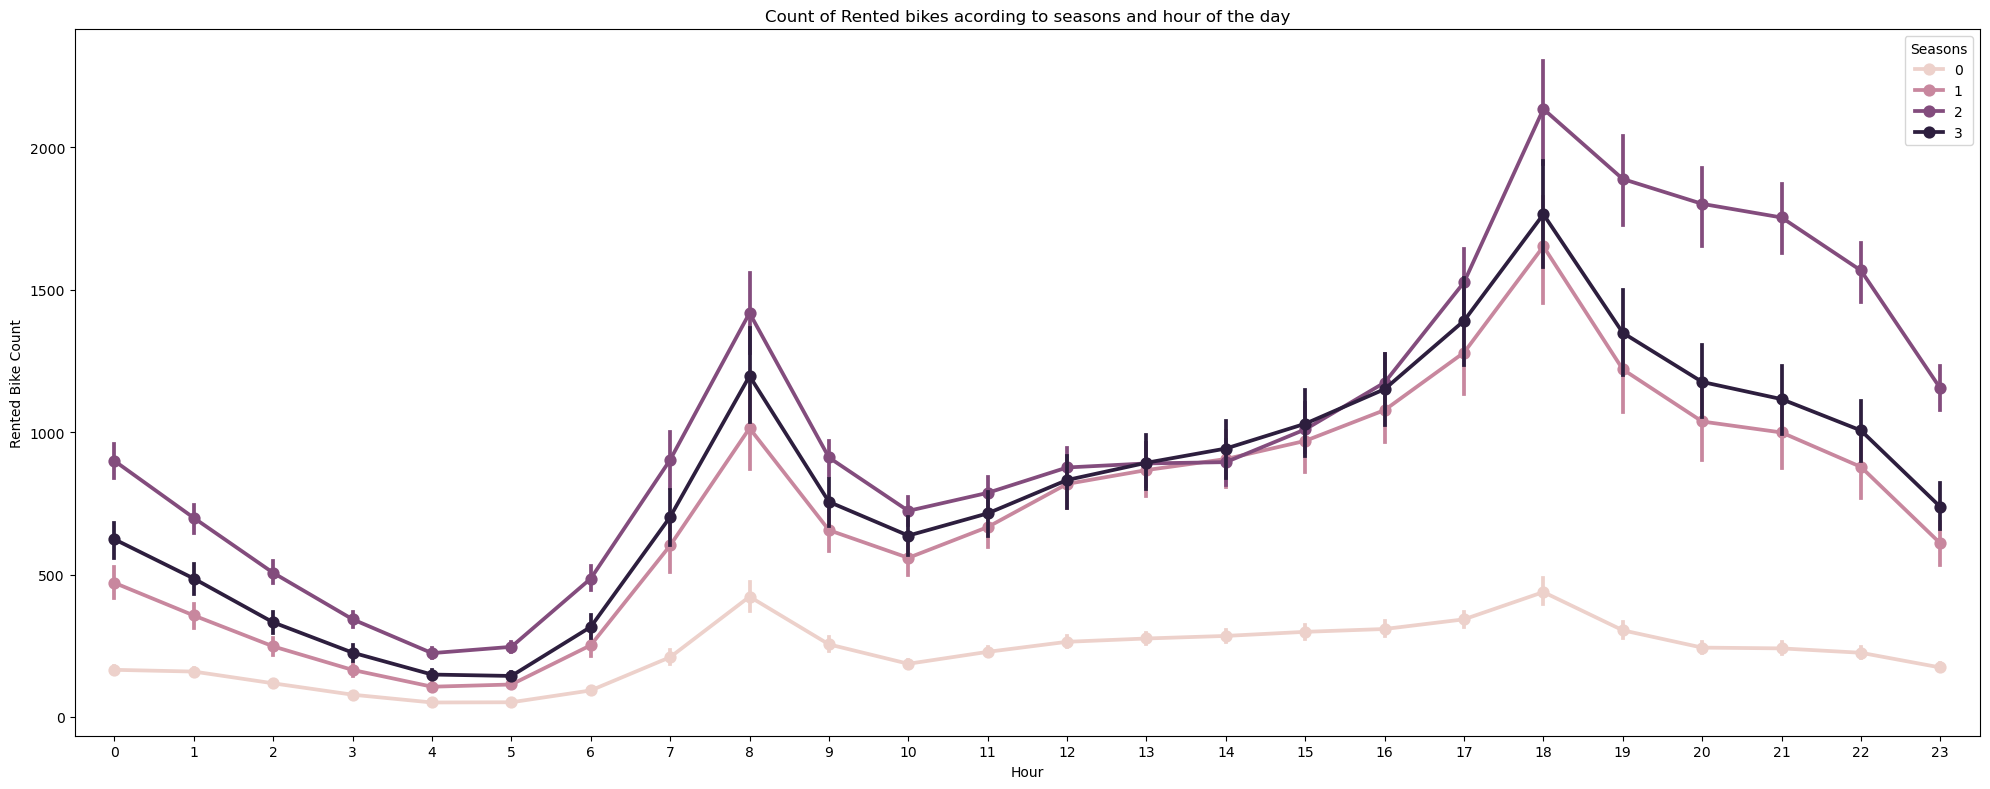

In [9]:
fig,ax=plt.subplots(figsize=(20,8))
sns.pointplot(data=df1_bike,x='Hour',y='Rented Bike Count',hue='Seasons',ax=ax);
ax.set(title='Count of Rented bikes acording to seasons and hour of the day');

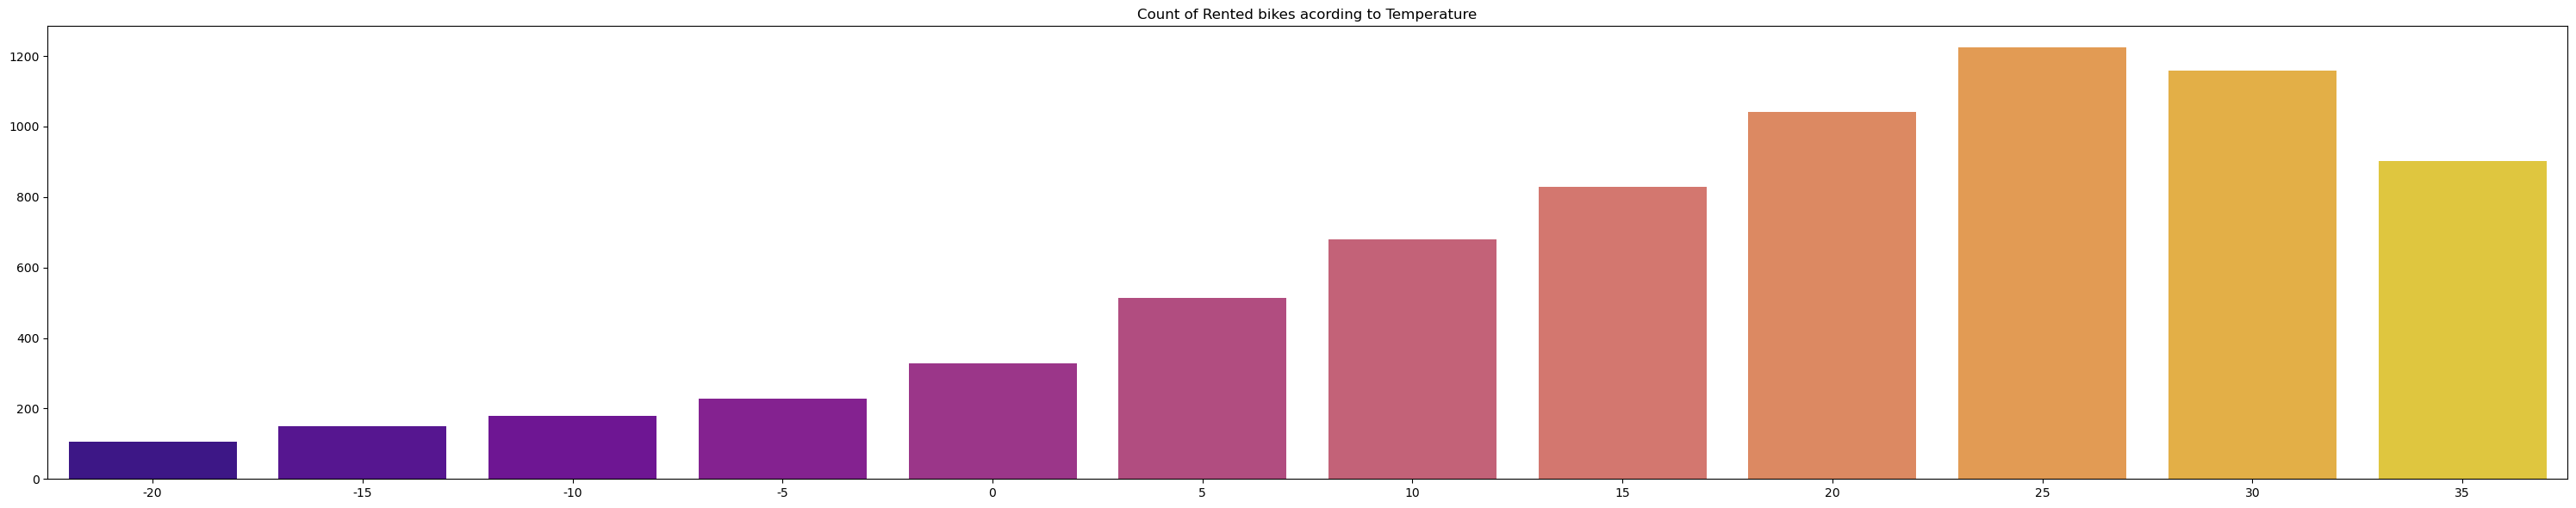

In [10]:

fig, ax = plt.subplots(figsize=(30, 6));
# temperature vs bike count
# Convert temperature in groups of 5C and average the rented bike counts for that range (rounding to 5s)
temp_min, temp_max = round(min(df1_bike['Temperature(C)'])/5)*5, round(max(df1_bike['Temperature(C)'])/5)*5
dict_temp = {}
for i in range(temp_min, temp_max, 5):
    # Filter rows based on the temperature interval
    filtered_df = df1_bike[(df1_bike['Temperature(C)'] >= i) & (df1_bike['Temperature(C)'] < i+5)]
    dict_temp[i] = filtered_df['Rented Bike Count'].mean()
# print(dict_temp)
# print(temp_max, temp_min)
sns.barplot(data=dict_temp,ax=ax, palette='plasma');
ax.set(title='Count of Rented bikes acording to Temperature');

# plt.show()

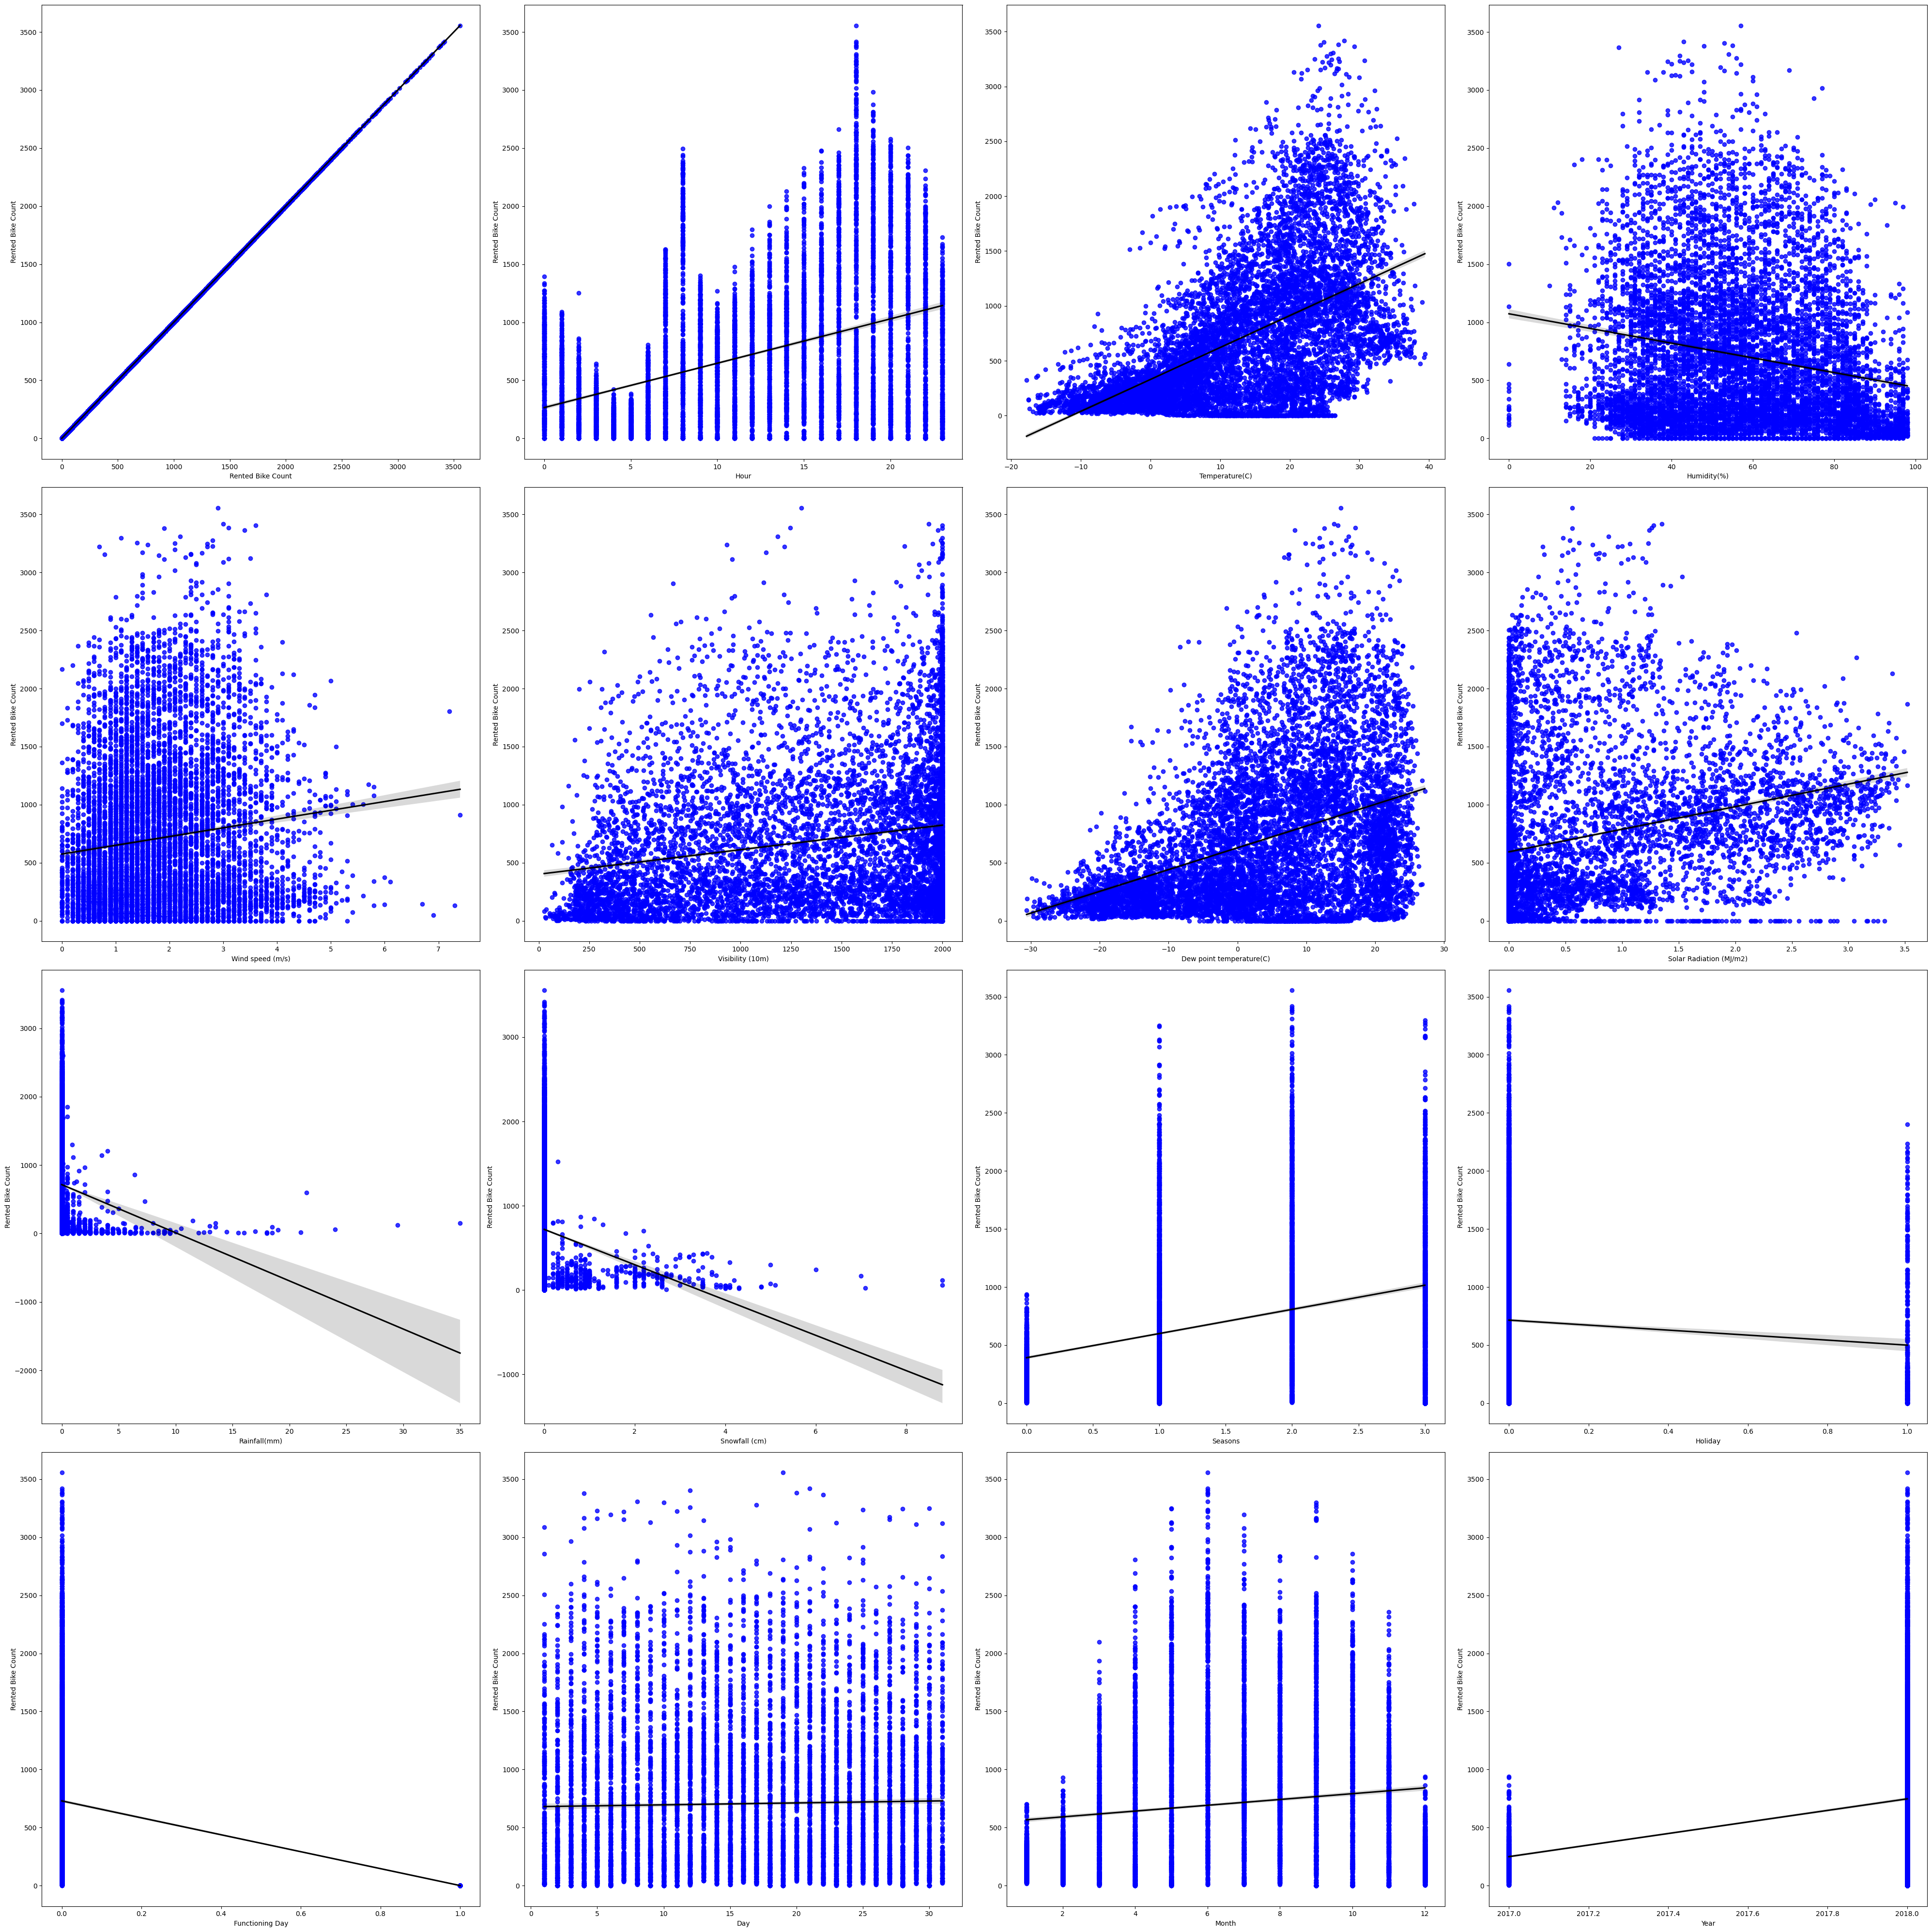

In [11]:
# printing the regression plot for all the numerical features
fig,ax=plt.subplots(4, 4, figsize=(40,40)) # since we know there are 16 features
for idx, col in enumerate(df1_bike.columns):
  sns.regplot(x=df1_bike[col],y=df1_bike['Rented Bike Count'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"}, ax=ax[idx//4][idx%4])

In [12]:

from sklearn.model_selection import train_test_split

y = df1_bike['Rented Bike Count']
X = (df1_bike.drop(columns = ['Rented Bike Count'])).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

model_names = ['Linear Regression Model',
 'Support Vector Machine (Regression)',
 'Ridge Regression',
  'Lasso Regression',
 'Gradient Boosting Regression',
  'Random Forest',
  'Decision Tree']
models = [LinearRegression(),
    SVR(), 
    linear_model.Ridge(), 
    linear_model.Lasso(),
    GradientBoostingRegressor(),
    RandomForestRegressor(),
    DecisionTreeRegressor()]

evaluation_metrics = ['Mean Squared Error (MSE)',
 'Root MSE (RMSE)',
  'Mean Absolute Error',
  'R2 Score', 
  'Explained Variance Score']



In [46]:
y_preds = [] # list of model predictions
model_scores = [] # list of model scores based on the evaluation metrics defined
for model in models:
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    y_preds.append(y_pred)

    mse = mean_squared_error(y_test.values, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.values, y_pred)
    r2 = r2_score(y_test.values, y_pred)
    evs = explained_variance_score(y_test.values, y_pred)

    model_scores.append([mse, rmse, mae, r2, evs])


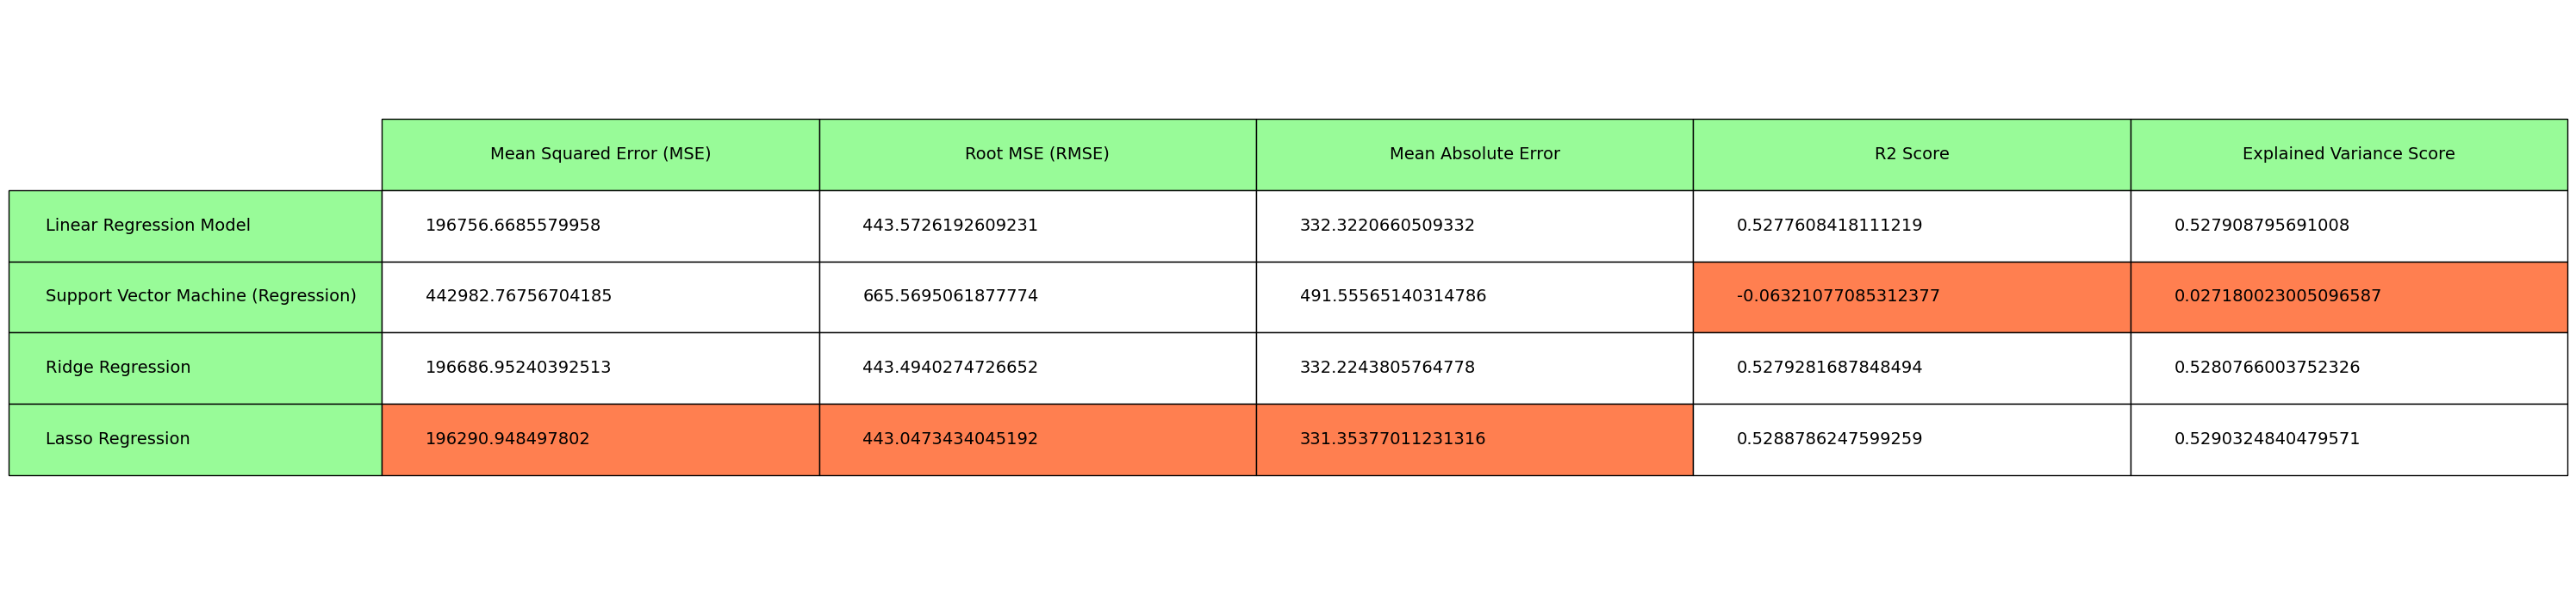

In [47]:
plt.rcParams["figure.figsize"] = [30, 7]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')

table1 = axs.table(cellText=model_scores[0:4],
                      cellLoc = 'left',
                      rowLabels = model_names[0:4],
                      rowColours= ["palegreen"] * 10,
                      colLabels=evaluation_metrics,
                      colColours= ["palegreen"] * 10,
                      loc='center')

# Highlight cells with minimum value in each column
for col_idx, metric in enumerate(evaluation_metrics):
    col_values = [row[col_idx] for row in model_scores[0:4]]
    min_value_idx = col_values.index(min(col_values))

    # Highlight the cell with minimum value in coral color
    table1[min_value_idx + 1, col_idx].set_facecolor("coral")
        
table1.auto_set_font_size(False)
table1.set_fontsize(14)
table1.scale(1, 4)
fig.tight_layout()
plt.show()


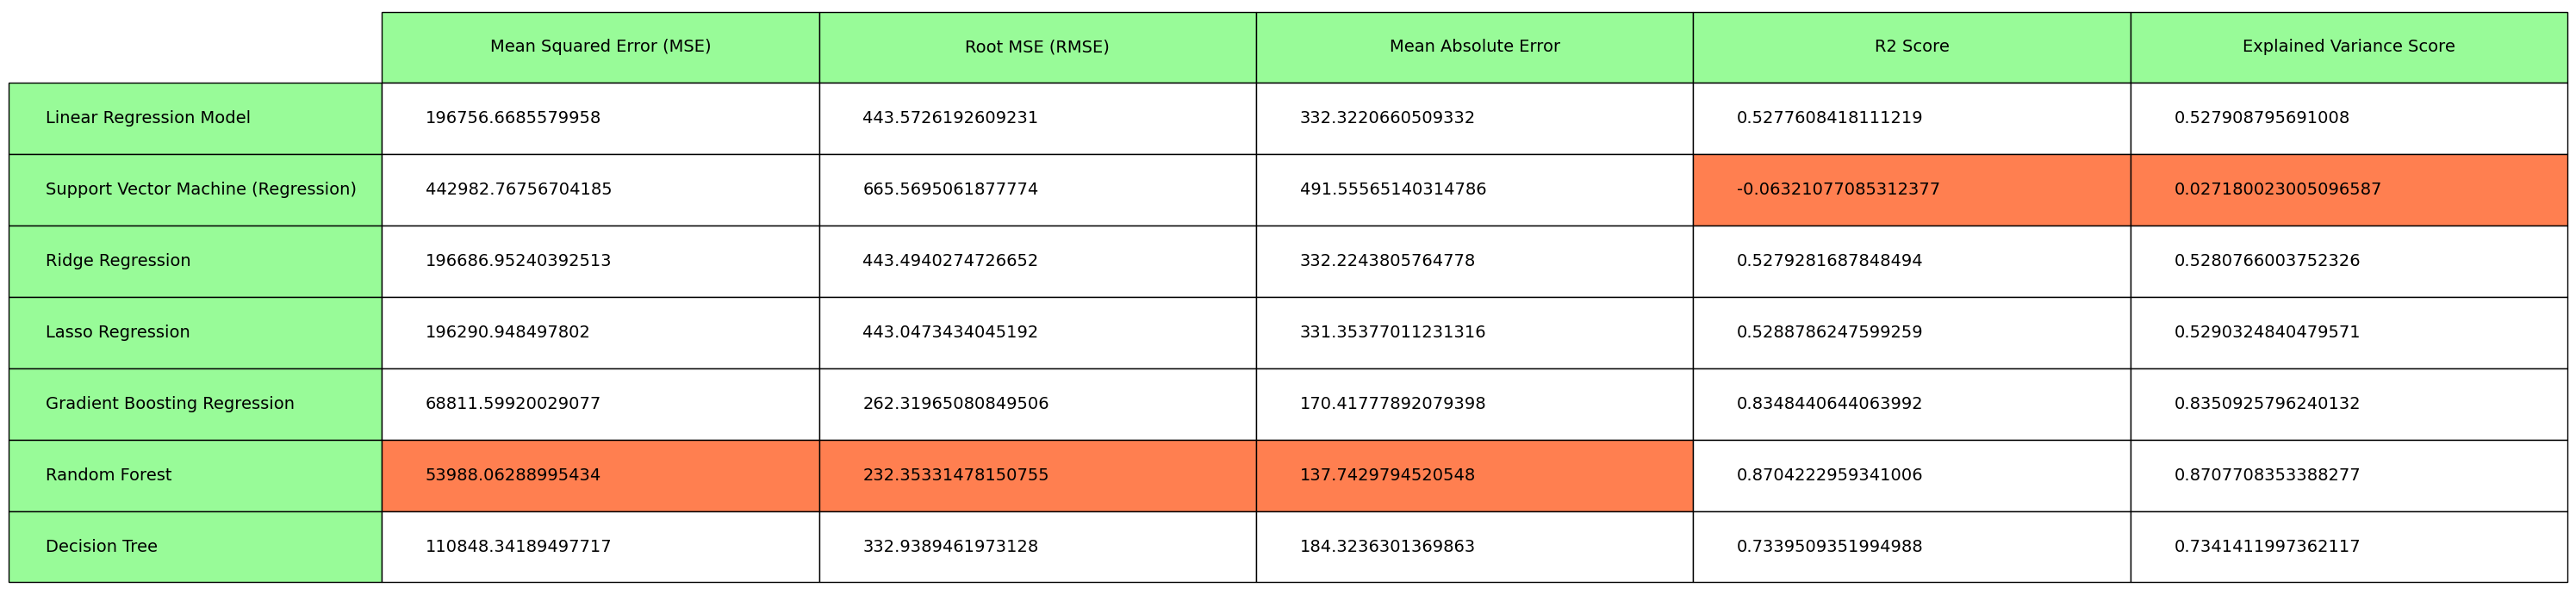

In [48]:
plt.rcParams["figure.figsize"] = [30, 7]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')
table2 = axs.table(cellText=model_scores,
                      cellLoc = 'left',
                      rowLabels = model_names,
                      rowColours= ["palegreen"] * 10,
                      colLabels=evaluation_metrics,
                      colColours= ["palegreen"] * 10,
                      loc='center')

# Highlight cells with minimum value in each column
for col_idx, metric in enumerate(evaluation_metrics):
    col_values = [row[col_idx] for row in model_scores]
    min_value_idx = col_values.index(min(col_values))

    # Highlight the cell with minimum value in coral color
    table2[min_value_idx + 1, col_idx].set_facecolor("coral")
        
table2.auto_set_font_size(False)
table2.set_fontsize(14)
table2.scale(1, 4)
fig.tight_layout()
plt.show()

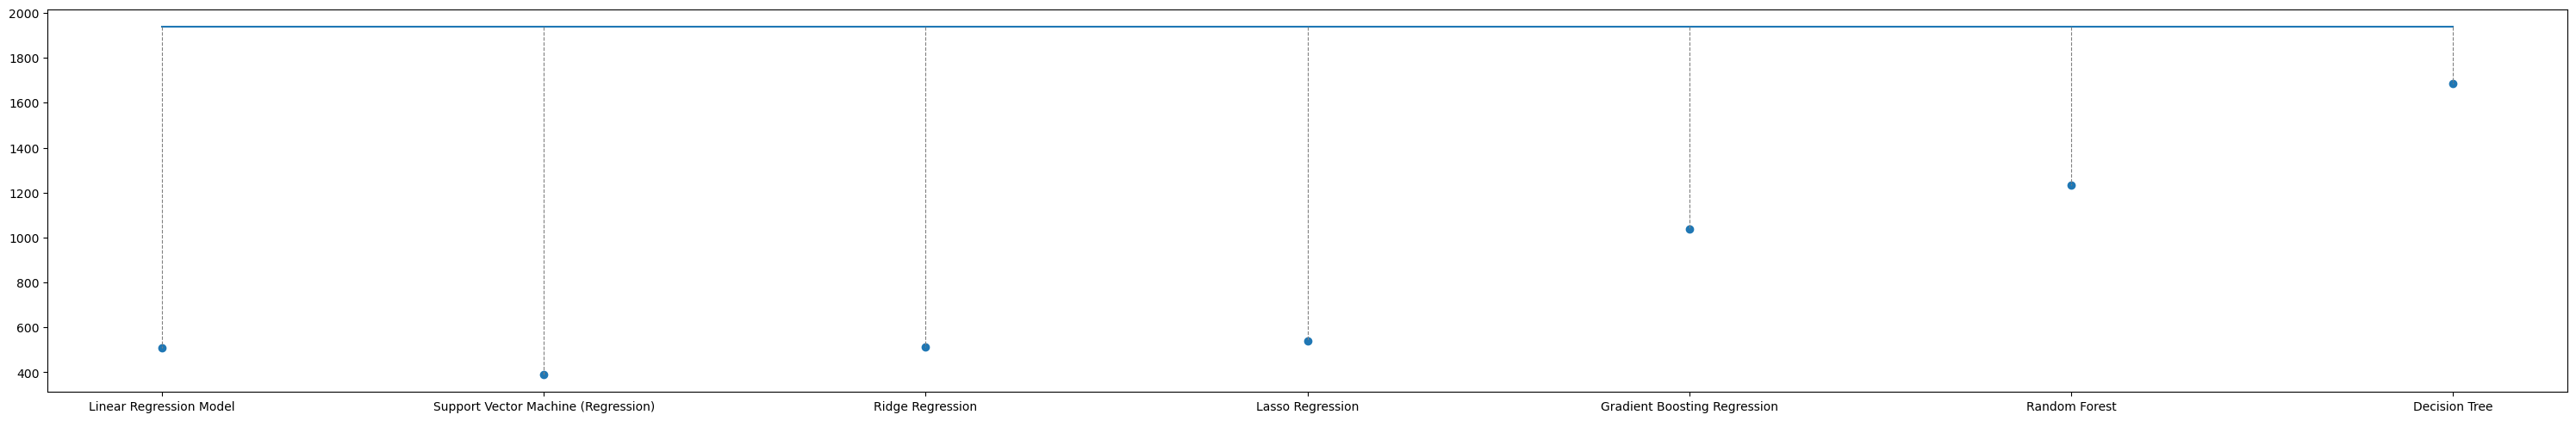

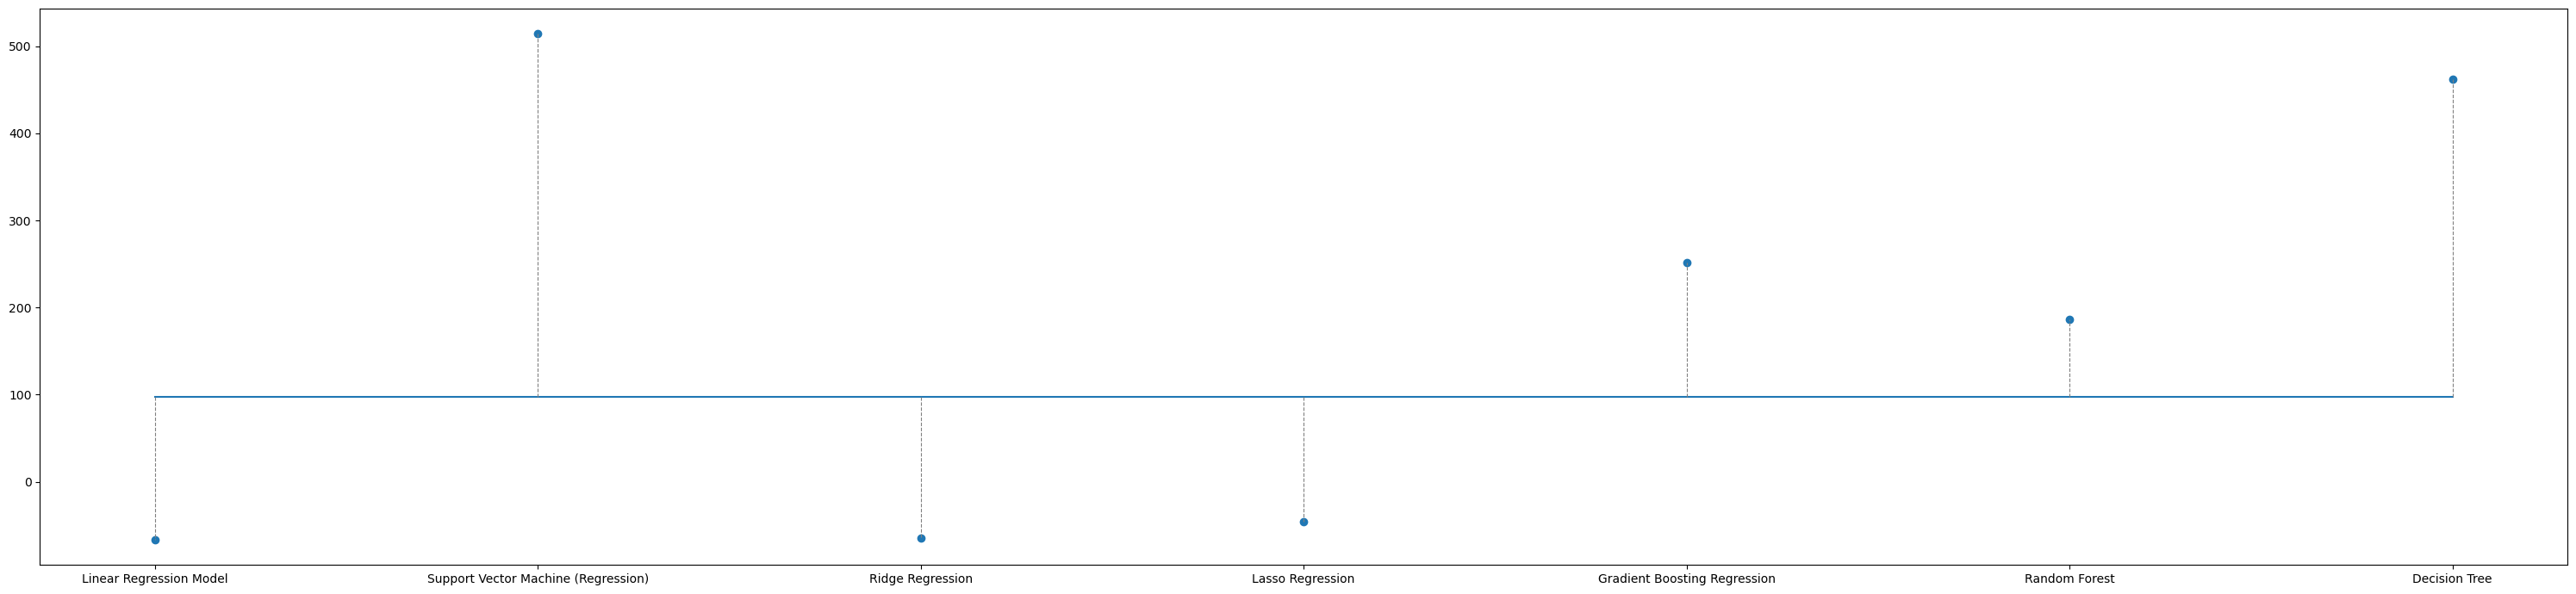

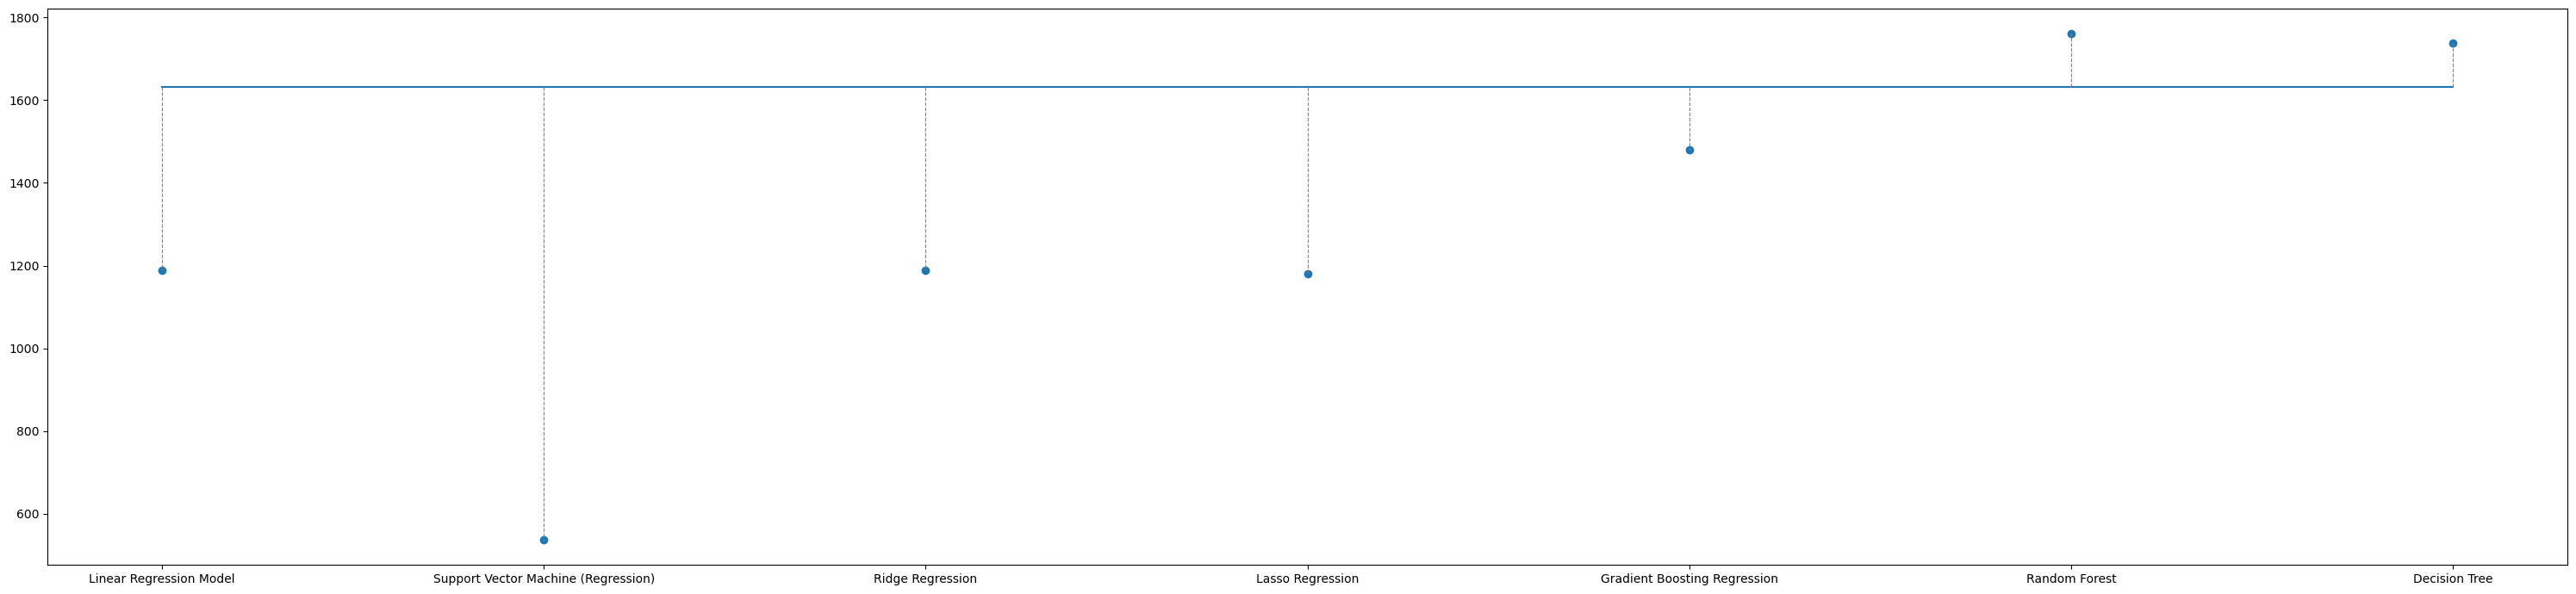

In [42]:
# printing how far the predicted value is to the actual value for a random row in X
import random
fig, ax = plt.subplots(figsize=(30, 5));

length = len(model_names)

for i in range(3):
    idx = random.randint(0,len(y_test)-1)
    plt.plot(range(length), [(y_test.values)[idx]]*length, label='True Value');
    plt.scatter(range(length), [y_preds[q][idx] for q in range(length)], label='Predicted Values');
    for j in range(length):
        plt.plot([j, j], [(y_test.values)[idx], y_preds[j][idx]], color='gray', linestyle='--', linewidth=0.8)
    plt.xticks(range(length), model_names)
    plt.tight_layout()
    plt.show()



In [ ]:
df_gdp = pd.read_csv("China_GDP.csv")
df_gdp.head(5)

In [ ]:
print(df_gdp.info())
print(df_gdp.isna().sum())

In [ ]:
# plot Year vs GDP_value
sns.scatterplot(data=df_gdp, x = 'Value', y = 'Year');
plt.show()

In [ ]:
sns.regplot(x=df_gdp['Value'],y=df_gdp['Year'],scatter_kws={"color": 'blue'}, line_kws={"color": "black"})

In [ ]:
from sklearn.model_selection import train_test_split
y = df_gdp['Year']
X = (df_gdp.drop(columns = ['Year'])).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(10, 10));
for idx, model in enumerate(models[0:4]):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    # Plot the data points for training set
    ax[idx//2][idx%2].scatter(X_train, y_train, marker='o', color='black', label='Train');
    # Plot the data points for testing set (true)
    ax[idx//2][idx%2].scatter(X_test, y_test, color='purple', marker='o', label='True');
    # Plot the data points for testing set (predicted)
    ax[idx//2][idx%2].scatter(X_test, y_pred, color='blue', marker='o', label='Predicted');
    ax[idx//2][idx%2].set_title(model_names[idx])
    ax[idx//2][idx%2].set_xlabel("GDP")
    ax[idx//2][idx%2].set_xlabel("Year")
    ax[idx//2][idx%2].legend()
plt.title("True vs Predicted Performance of Linear Regression Models")
plt.show()

In [ ]:

y_preds = [] # list of model predictions
model_scores = [] # list of model scores based on the evaluation metrics defined

fig, ax = plt.subplots(3, 1, figsize=(10, 10));
for idx, model in enumerate(models[4:]):
    reg = model
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    # Plot the data points for training set
    ax[idx].scatter(X_train, y_train, marker='o', color='black', label='Train');
    # Plot the data points for testing set (true)
    ax[idx].scatter(X_test, y_test, color='purple', marker='o', label='True');
    # Plot the data points for testing set (predicted)
    ax[idx].scatter(X_test, y_pred, color='blue', marker='o', label='Predicted');
    ax[idx].set_title(model_names[4+idx])
    ax[idx].set_xlabel("GDP")
    ax[idx].set_xlabel("Year")
    ax[idx].legend()
    
    y_preds.append(y_pred)

    mse = mean_squared_error(y_test.values, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test.values, y_pred)
    r2 = r2_score(y_test.values, y_pred)
    evs = explained_variance_score(y_test.values, y_pred)

    model_scores.append([mse, rmse, mae, r2, evs])
    
plt.title("True vs Predicted Performance of Non-Linear Regression Models")
plt.show()


In [ ]:
plt.rcParams["figure.figsize"] = [30, 7]
plt.rcParams["figure.autolayout"] = True
fig, axs = plt.subplots(1, 1)
axs.axis('tight')
axs.axis('off')

table1 = axs.table(cellText=model_scores,
                      cellLoc = 'left',
                      rowLabels = model_names[4:],
                      rowColours= ["palegreen"] * 10,
                      colLabels=evaluation_metrics,
                      colColours= ["palegreen"] * 10,
                      loc='center')

# Highlight cells with minimum value in each column
for col_idx, metric in enumerate(evaluation_metrics):
    col_values = [row[col_idx] for row in model_scores]
    min_value_idx = col_values.index(min(col_values))

    # Highlight the cell with minimum value in coral color
    table1[min_value_idx + 1, col_idx].set_facecolor("coral")
        
table1.auto_set_font_size(False)
table1.set_fontsize(14)
table1.scale(1, 4)
fig.tight_layout()
plt.show()


In [ ]:
# printing how far the predicted value is to the actual value for a random row in X
import random
fig, ax = plt.subplots(figsize=(30, 5));

length = len(model_names[4:])

for i in range(3):
    idx = random.randint(0,len(y_test)-1)
    plt.plot(range(length), [(y_test.values)[idx]]*length, label='True Value');
    plt.scatter(range(length), [y_preds[q][idx] for q in range(length)], label='Predicted Values');
    for j in range(length):
        plt.plot([j, j], [(y_test.values)[idx], y_preds[j][idx]], color='gray', linestyle='--', linewidth=0.8)
    plt.xticks(range(length), model_names[4:])
    plt.tight_layout()
    plt.show()
